### Q1 Simulation in Sociology

In [44]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
#data= sts.norms.rvs(means, std, size)

In [45]:
def inc_sim(profile):

    #set random seed
    np.random.seed(333)

    #create a matrix of lognormally distributed errors, all of the same dimension as number of years* number of simulations
    errors = np.random.lognormal(0, p['stddev'] ,(p['lf_years'], p['num_draws']))
    
    #define the initial term
    base= np.log(p['inc'])
    
    #create an initial matrix of dim (lf_years, num_draws) (same as that of errors)
    ln_inc_mat = np.zeros((p['lf_years'], p['num_draws']))

    #fill the first row of the matrix with simulations for the first year
    ln_inc_mat[0, :] = base + errors[0, :]

    #loop and apply model to the remaining rows
    for t in range(1, p['lf_years']):
        ln_inc_mat[t, :] = (1-p['rho'])*(base+ (p['g']*t))+p['rho']*ln_inc_mat[t - 1, :]+errors[t, : ]

    
    return ln_inc_mat



In [46]:
p = {   'inc'         : 80000,      #starting income
        'stddev'      : 0.13,       #standard deviation
        'rho'         : 0.4,        #persist rate
        'g'           : 0.025,      #growth rate
        'st_year'     : int(2020),  #start year
        'lf_years'    : 40,         #years to live        
        'num_draws'   : 10000       #simulations
    }
    

In [47]:
inc_mat=np.exp(inc_sim(p))
print(inc_mat)

[[ 279258.99484829  227043.1944107   204834.08840758 ...  200657.96605538
   308976.72258462  235351.20990178]
 [ 341402.6925106   328083.69850454  328932.93008109 ...  372129.48263485
   457370.78259538  341587.86979765]
 [ 527639.89997765  498226.66915106  311896.07999181 ...  375529.17068719
   375158.29510574  380449.99463128]
 ...
 [ 961398.64485417 1011944.98691081  918419.294544   ... 1088603.07676243
  1232401.5548548  1234062.5674418 ]
 [ 952593.03572949  893091.77441462 1002366.93947589 ... 1051657.19151217
  1234423.29179043 1224055.53649951]
 [1242179.84692654  968510.65670467  947306.22668918 ...  851751.21526031
  1163587.54818126 1059745.82742675]]


#### Plotting of Individual Line
We randomly select one of the 10,000 simulated instances (here, ID 540) to plot over the period 2020-2060 

Text(0,0.5,'Annual Salary(\\$s)')

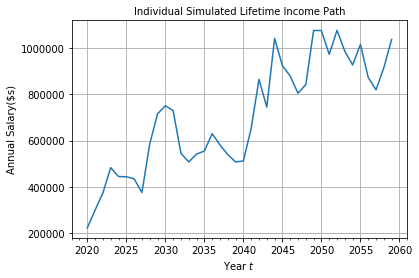

In [50]:
%matplotlib inline
year_vec = np.arange(p['st_year'], p['st_year'] + p['lf_years'])
individual = 540
fig, ax = plt.subplots()
plt.plot(year_vec, inc_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual Simulated Lifetime Income Path', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual Salary(\$s)')

### b) Distribution of Simulated Income 

First, we plot a histogram of the income based on values simulated in part a)

Text(0.5,1,'Number of Respondents in Wealth Bins')

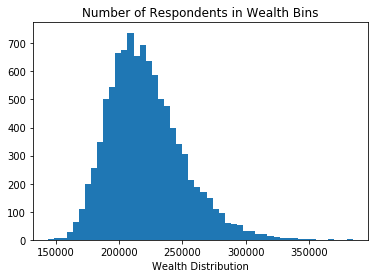

In [48]:
plt.hist(inc_mat[0,:], bins=50)
plt.xlabel("Wealth Distribution")
plt.title("Number of Respondents in Wealth Bins")

The values that we have plotted here are the exponentiated values of the results of the simulation. Since the variables in the simulation were in lognormally distributed, their exponentiation would result in normally distributed variables. 

Using the properties of the normal distribution, we can find out the percentage of values expected to be below a certain values

In [53]:
print(np.mean(inc_mat))
print(np.std(inc_mat))

715070.4913219813
249161.33389010464


### c) Debt PayOff

Here, we need to calculate a new vector which provides integer values of the years needed to pay off debts. 


In [66]:
loan=95000
payoff_years=np.zeros((1,p['num_draws']))
print(payoff_years)


    

[[0. 0. 0. ... 0. 0. 0.]]
19.9
19.7
19.4
19.0
18.5
17.9


6

In [75]:
def check_debt(column, debt):
    paid_year=0
    for i in range(len(column)):
        debt-= 0.1*column[i]
        if debt>0:
            print(debt)
            continue
        else:
            paid_year= i+1
    return paid_year
   
fake_loan=20
test=[10,20,30,40,50,60]
check_debt(test, fake_loan)
      
    

19.0
17.0
14.0
10.0
5.0


6

### Part d) Changes in Initial Income and Variability

In [ ]:
p_new = {'inc'         : 80000,      #starting income
        'stddev'      : 0.17,       #standard deviation
        'rho'         : 0.4,        #persist rate
        'g'           : 0.025,      #growth rate
        'st_year'     : int(2020),  #start year
        'lf_years'    : 40,         #years to live        
        'num_draws'   : 10000       #simulations
    }
    